In [1]:
# Import pertinent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Import loan data into dataframe
df = pd.read_csv('loan_data.csv')

In [3]:
# Get some basic information on data
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# Check to see if there are missing data
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<AxesSubplot:>

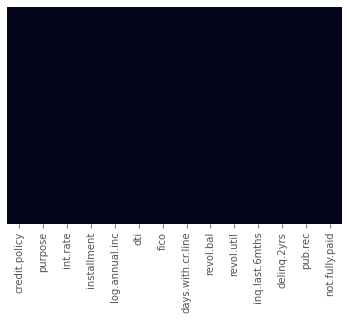

In [7]:
# Show visually there is no missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:title={'center':'Fico vs Has Policy'}, xlabel='fico', ylabel='Count'>

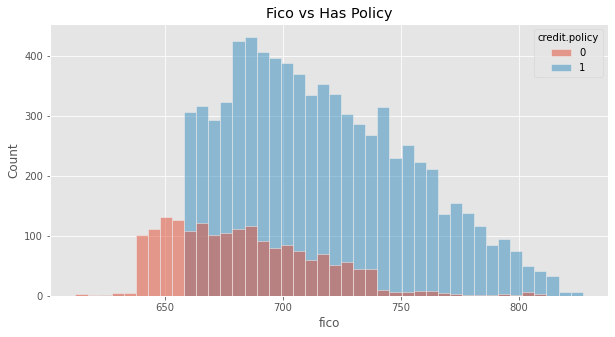

In [8]:
# Taking a deeper look into Fico vs Credit Policies
plt.figure(figsize=(10,5))
plt.title('Fico vs Has Policy')
sns.histplot(x='fico', data=df, hue='credit.policy')

<AxesSubplot:title={'center':'Fico vs Not Fully Paid'}, xlabel='fico', ylabel='Count'>

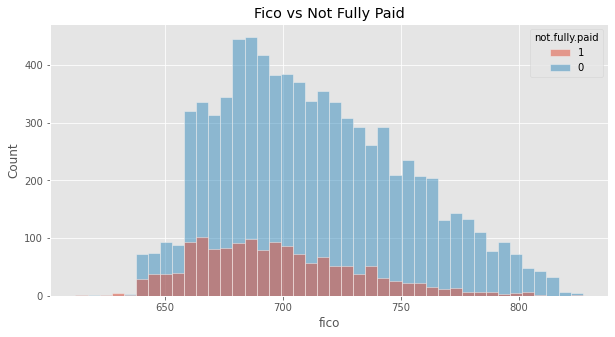

In [9]:
# Take a deeper look into Fico vs. If not paid
plt.figure(figsize=(10,5))
plt.title('Fico vs Not Fully Paid')
sns.histplot(data=df, x='fico', hue='not.fully.paid', hue_order=[1,0])

<AxesSubplot:title={'center':'Purpose vs Not Fully Paid'}, xlabel='purpose', ylabel='count'>

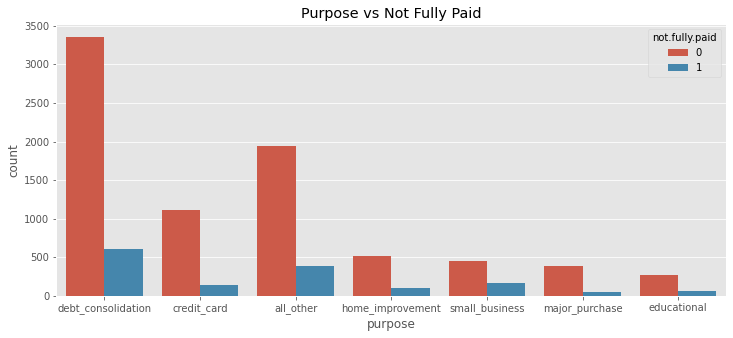

In [10]:
plt.figure(figsize=(12,5))
plt.title('Purpose vs Not Fully Paid')
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

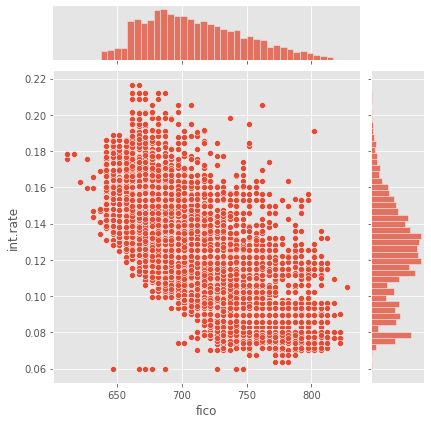

In [11]:
# Taking a deeper look into fico vs. Int Rates
sns.jointplot(x='fico', y='int.rate', data=df)

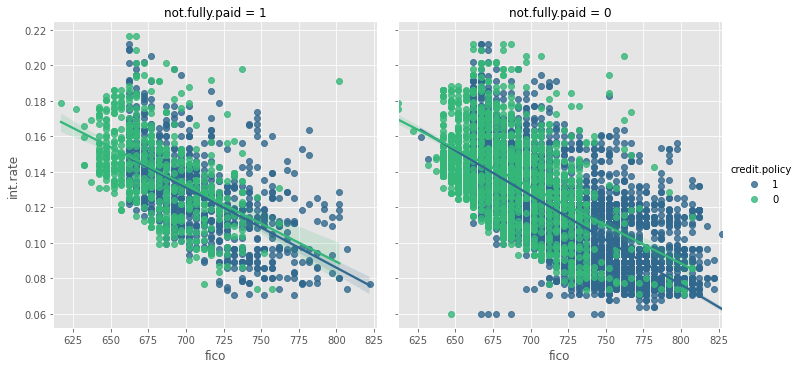

In [12]:

# See if there is a trend with not fully paid, credit policies, and interest rates
sns.lmplot(x='fico', y='int.rate', data=df, col='not.fully.paid', hue='credit.policy', col_order=[1,0], palette='viridis', hue_order=[1,0])

In [13]:
# Because we have categorical features, we will create dummy variables in order to be able to use it
# Check how many categories there are
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [14]:
# Creating a dummy variable for purpose column
final_df = pd.get_dummies(data=df, columns=['purpose'], drop_first=True)
final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [15]:
# Import train test split model
from sklearn.model_selection import train_test_split

In [22]:
# Assign independent and dependant variables and split data
X = final_df.drop('not.fully.paid', axis=1)
y = final_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=13)

In [23]:
# Decision Tree Model used and instancea created
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [25]:
# Fit model
dtree.fit(X_train, y_train)

# Store predictions
dtree_pred = dtree.predict(X_test)

In [27]:
# See how well the model did
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, dtree_pred))
print('\n')
print(classification_report(y_test, dtree_pred))

[[2067  371]
 [ 343   93]]


              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2438
           1       0.20      0.21      0.21       436

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.75      0.75      2874



Decision tree model did average, however this can be improved using a random forest model

In [28]:
# Import rainforest classifier and create an instance
from sklearn.ensemble import RandomForestClassifier
r_tree = RandomForestClassifier()

In [29]:
# Fit training data into model and create predictions
r_tree.fit(X_train, y_train)

# Store predictions
r_pred = r_tree.predict(X_test)

In [31]:
# See how well the model did
print(confusion_matrix(y_test, r_pred))
print('\n')
print(classification_report(y_test, r_pred))

[[2422   16]
 [ 424   12]]


              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2438
           1       0.43      0.03      0.05       436

    accuracy                           0.85      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.79      0.85      0.79      2874



Using a rainforest classifier improved predictive results